<a href="https://colab.research.google.com/github/henriquevedoveli/modelagem-covid/blob/master/notebooks/covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Pré-Processamento e Análise Exploratória de Dados do COVID-19
---

### **ESTE PROJETO É PURAMENTE PARA FINS EDUCATIVOS**
#### Este projeto foi feito como forma de atividade para o curso de Modelagem Matemática para COVID-19 disponibilizado pela Universidade Estadual de Maringá (UEM).

### Objetivo: Construção de Dashboards em R e construção de gráficos.
---

![title](https://github.com/henriquevedoveli/modelagem-covid/blob/master/notebooks/cvd.jpg?raw=1)


#### Tópicos estudados durante o projeto

- Modelos matemáticos compartimentais (SI, SIR, SEIR...)

- Obtenção e limpeza da dados confiáveis

- Visualização e interpretação de gráficos

- Formulação de Dashboards em R

---

Este notebook um pré-processamento dos dados do COVID-19 do Brasil e do estado do Paraná para que possam ser utilizados na construção de uma dashboard online em R, além de uma análise exploratória simples dos dados buscando trazer um panorama geral da situação.

Não foi realizada uma análise aprofundada dos dados pois meu principal objetivo com o projeto é o estudo da construção de dashboards em R.

> Link para a Dashboard - [COVID-19 Dashboard](https://henrique-vedoveli.shinyapps.io/covid19/) 

## Dados 
Os dados foram disponibilizados no repositório da Universidade John Hopkins e no site Brasil.io e estão disponíveis nos seguintes links:

- [JHU CSSE COVID-19 Dataset](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series)

- [Brasil.io](https://data.brasil.io/dataset/covid19/_meta/list.html)

---

**Bibliotecas Necessárias**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline
pd.set_option('display.max_columns', None)

### Importando os Dados

In [ ]:
url_confirmados = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
url_obitos = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
url_recuperados = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

confirmados = pd.read_csv(url_confirmados)
obitos = pd.read_csv(url_obitos)
recuperados = pd.read_csv(url_recuperados)

brasil = pd.read_csv('/content/drive/MyDrive/Data Science/coronavirus/caso_full.csv')

display(confirmados.head())
display(obitos.head())
display(recuperados.head())

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20,12/24/20,12/25/20,12/26/20,12/27/20,12/28/20,12/29/20,12/30/20,12/31/20,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21,2/6/21,2/7/21,2/8/21,2/9/21,2/10/21,2/11/21,2/12/21,2/13/21,2/14/21,2/15/21,2/16/21,2/17/21,2/18/21,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21,2/25/21,2/26/21,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,2,4,4,4,4,5,7,8,11,12,13,15,16,18,20,24,25,29,30,34,41,43,76,80,91,107,118,146,175,197,240,275,300,338,368,424,445,485,532,556,608,666,715,785,841,907,934,997,1027,1093,1177,1236,1331,1464,1532,1704,1830,1940,2127,2291,2470,2705,2895,3225,3393,3564,3781,4042,4403,4687,4968,5227,5640,6054,6403,6665,7073,7654,8146,8677,9219,10001,10585,11176,11834,12459,13039,13662,14528,15208,15753,16512,17270,18057,18972,19554,20345,20920,21462,22146,22894,23550,24106,24770,25531,26314,26878,27536,27882,28428,28837,291

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20,12/24/20,12/25/20,12/26/20,12/27/20,12/28/20,12/29/20,12/30/20,12/31/20,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21,2/6/21,2/7/21,2/8/21,2/9/21,2/10/21,2/11/21,2/12/21,2/13/21,2/14/21,2/15/21,2/16/21,2/17/21,2/18/21,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21,2/25/21,2/26/21,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,3,3,4,4,4,4,4,4,8,10,12,15,16,16,17,18,18,19,22,23,29,30,30,30,33,36,36,40,40,43,47,52,58,59,61,64,68,72,85,90,95,104,106,109,115,120,122,127,132,136,153,168,170,173,178,188,194,206,217,219,220,221,228,236,247,250,258,266,274,298,304,313,331,361,373,388,409,430,450,455,475,482,495,508,550,552,573,585,597,617,638,674,682,716,728,740,752,780,809,821,828,866,900,922,939,959,973,996,1012,1040,1064,1096,1117,1149,1166,1183,1185,1188,1192,1213,1227,1249,1261,1271

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20,12/24/20,12/25/20,12/26/20,12/27/20,12/28/20,12/29/20,12/30/20,12/31/20,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21,2/6/21,2/7/21,2/8/21,2/9/21,2/10/21,2/11/21,2/12/21,2/13/21,2/14/21,2/15/21,2/16/21,2/17/21,2/18/21,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21,2/25/21,2/26/21,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,5,5,10,10,10,15,18,18,29,32,32,32,32,32,40,43,54,99,112,131,135,150,166,179,188,188,207,220,228,252,260,310,331,345,397,421,458,468,472,502,558,558,610,648,691,745,745,778,801,850,930,938,996,1040,1075,1097,1128,1138,1209,1259,1303,1328,1428,1450,1522,1585,1762,1830,1875,2171,2651,3013,3326,3928,4201,4725,5164,5508,6158,7660,7962,8292,8764,8841,9260,9869,10174,10306,10674,12604,13934,14131,15651,16041,17331,19164,19366,20103,20179,20700,20847,2088

## Dados do Brasil

###  Dicionário de Variaveis

Para os dados fornecidos pela John Hopkins cada coluna do DataFrame tem o seguinte significado:


Coluna   | Significado
--------- | :------:
**Province/State** | Estado ou Provincia do país, como por exemplo Wuhan (China) ou Guadeloupe (França).
**Country/Region** | País ou Região.
**Lat** | Latitude do país ou região
**Long** | Longitude do país ou região

As colunas seguintes são os dias com os casos confirmados, mortos ou recuperados dependendo do DataFrame.

---

### Filtrando os Dados

Para obter apenas os dados do Brasil é necessário realizar um filtro no Dataset, já que ele tem os dados de todos os países, após realizado o filtro foram retiradas as colunas `Province/State`, `Country/Region`, `Lat` e `Long` para que o os DataFrames sejam apenas series temporais. 

---

In [ ]:
confirmados = confirmados[confirmados['Country/Region'] == "Brazil"]
obitos = obitos[obitos['Country/Region'] == "Brazil"]
recuperados = recuperados[recuperados['Country/Region'] == "Brazil"]

confirmados = confirmados.drop(columns = ['Province/State', 'Country/Region', 'Lat', 'Long'])
obitos = obitos.drop(columns = ['Province/State', 'Country/Region', 'Lat', 'Long'])
recuperados = recuperados.drop(columns = ['Province/State', 'Country/Region', 'Lat', 'Long'])

### Juntando os Dataframes

Agora com os dados mais limpos e filtrados eles serão juntos de modo que formem apenas um DataFrame contendo os casos confirmados, mortos e recuperados, para que o DataFrame resultante fique em uma forma mais legível de se ler os dados ao serem concatenados os DataFrame originais foram transposto utilizando a função `.T` e para unir os DataFrames foi utilizado a função `pd.concat()`.

Após os DataFrames serem juntos as colunas serão renomeadas para padronizar os dados e facilitar o restante do projeto.

 

---

In [ ]:
dados = pd.concat([confirmados.T, obitos.T], axis=1, sort=False)
dados = pd.concat([dados, recuperados.T], axis = 1, sort = False)

dados['data'] = pd.to_datetime(dados.index)
dados.index = range(0,len(dados))

dados.columns = ['casos_acumulados', 'obitos_acumulados', 'recuperados_acumulados', 'data']

dados.head()

,casos_acumulados,obitos_acumulados,recuperados_acumulados,data
0,0,0,0,2020-01-22
1,0,0,0,2020-01-23
2,0,0,0,2020-01-24
3,0,0,0,2020-01-25
4,0,0,0,2020-01-26


In [ ]:
dados = dados.query('casos_acumulados > 0')

### Novas colunas
Com o DataFrame limpo e organizado podemos adicionar novas colunas que nos ajudaram depois ao realizar a análise exploratória dos dados.

As colunas adicionadas foram:

Coluna   | Significado
--------- | :------:
**casos_novos** | Novos casos por dia 
**obitos_novos** | Novos óbitos por dia
**recuperados_novo** | Novos recuperados por dia
**rolling_mean_casos_novos** | Média móvel de 3 dias para os casos novos
**rolling_mean_casos** | Média móvel de 3 dias para os casos acumulados
**rolling_mean_obitos_acumulados** | Média móvel de 3 dias para os óbitos acumulados
**rolling_mean_obitos_novos** | Média móvel de 3 dias para os óbitos novos
**casos_ativos** | Casos ativos por dia

> Para as colunas `casos_novos`, `obitos_novos` e `recuperados_novos` foi utilizada a função `.diff()` que subtrai uma linha do DataFrame pela sua anterior.

> Para as colunas `rolling_mean_casos_novos`, `rolling_mean_casos`, `rolling_mean_casos`, `rolling_mean_obitos_acumulados` e `rolling_mean_obitos_novos` foi utilizado a função `.rolling()` com o valor de 3 dias e `.mean()` para obter a média móvel.

> Para a coluna `casos_ativos` foi utilizado a função `.diff()` com valor 10 dias, sendo assim, obtemos o valor da linha atual menos o valor de 10 dias atrás (10 linhas anteriores). 

---


In [ ]:
# adcionando as colunas de novos casos, novos obitos e novos recuperados
dados['casos_novos'] = dados['casos_acumulados'].diff()
dados['obitos_novos'] = dados['obitos_acumulados'].diff()
dados['recuperados_novos'] = dados['recuperados_acumulados'].diff()

# adicionando as colunas de media movel
n = 3
dados['rolling_mean_casos_novos'] = dados['casos_novos'].rolling(n).mean()
dados['rolling_mean_casos'] = dados['casos_acumulados'].rolling(n).mean()

dados['rolling_mean_obitos_acumulados'] = dados['obitos_acumulados'].rolling(n).mean()
dados['rolling_mean_obitos_novos'] = dados['obitos_novos'].rolling(n).mean()

# adicionando a coluna de casos ativos
dados['casos_ativos'] = dados['casos_acumulados'].diff(10)

dados.fillna(0, inplace = True)

dados = dados[['data','casos_acumulados','casos_novos','obitos_acumulados','obitos_novos','rolling_mean_casos_novos'
                      ,'rolling_mean_casos','rolling_mean_obitos_acumulados','rolling_mean_obitos_novos','casos_ativos']]

dados.tail()

,data,casos_acumulados,casos_novos,obitos_acumulados,obitos_novos,rolling_mean_casos_novos,rolling_mean_casos,rolling_mean_obitos_acumulados,rolling_mean_obitos_novos,casos_ativos
416,2021-03-13,11439558,76178.0,277102,1997.0,79084.333333,1.136022e+07,275032.000000,2148.666667,720928.0
417,2021-03-14,11483370,43812.0,278229,1127.0,68551.000000,1.142877e+07,276812.000000,1780.000000,689638.0
418,2021-03-15,11519609,36239.0,279286,1057.0,52076.333333,1.148085e+07,278205.666667,1393.666667,650382.0
419,2021-03-16,11603535,83926.0,282127,2841.0,54659.000000,1.153550e+07,279880.666667,1675.000000,664699.0
420,2021-03-17,11693838,90303.0,284775,2648.0,70156.000000,1.160566e+07,282062.666667,2182.000000,674494.0


## Dados do Paraná

### Dicionário de Dados

Coluna   | Significado
--------- | :------:
**city** | Cidade de onde foi retirados os dados
**city_ibge_code** | Código do IBGE da cidade
**date** | Data 
**epidemiological_week** | Semana epidemiologica 
**estimated_population_2019** | Populção estimada da cidade em 2019
**is_last** | Se a linha é a atualização mais recente, caso seja estará como `True`, caso contrário estará como `False`
**is_repeated** | Se o dado é repetido
**last_available_confirmed** | Casos acumulados
**last_available_confirmed_per_100k_inhabitants** | Casos acumulados divido por 100000 (cem mil) habitantes
**last_available_deaths** | Óbitos acumulados
**place_type** | Se o lugar é uma cidade ou um estado
**state** | Estado do local
**new_confirmed** | Novos casos confirmados
**new_deaths** | Novos óbitos

---

In [ ]:
brasil.tail()

,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
1747643,Tupirama,1721257.0,2021-03-17,202111,1922.0,1891.0,False,True,120,6243.49636,2021-03-15,0.0167,2,299,city,TO,0,0
1747644,Tupiratins,1721307.0,2021-03-17,202111,2729.0,2671.0,False,True,51,1868.81642,2021-03-15,0.0196,1,299,city,TO,0,0
1747645,Wanderlândia,1722081.0,2021-03-17,202111,11734.0,11683.0,False,True,628,5351.96864,2021-03-15,0.0127,8,324,city,TO,0,0
1747646,Xambioá,1722107.0,2021-03-17,202111,11520.0,11540.0,False,True,1457,12647.56944,2021-03-15,0.0124,18,313,city,TO,0,0
1747647,NaN,17.0,2021-03-17,202111,1590248.0,1572866.0,False,True,128258,8065.28290,2021-03-16,0.0135,1735,365,state,TO,0,0


### Filtrando os Dados

Para selecionar apenas os dados do Paraná foi utilizado uma query que filtra apenas dados do tipo estado e do que são da localidade do Paraná, sendo assim. obtemos apenas os dados do estado do Paraná, após isso foram retiradas algumas colunas que não são do nosso interesse.

---

In [ ]:
dados_estado = brasil.query('state == "PR" & place_type == "state"')
dados_estado = dados_estado[['date','is_last','new_confirmed','last_available_confirmed','new_deaths','last_available_deaths','estimated_population_2019',]]
dados_estado.index = range(0,len(dados_estado))
dados_estado.tail()


,date,is_last,new_confirmed,last_available_confirmed,new_deaths,last_available_deaths,estimated_population_2019
366,2021-03-13,False,6229,757791,157,13492,11433957.0
367,2021-03-14,False,3852,761643,93,13585,11433957.0
368,2021-03-15,False,2143,763786,41,13626,11433957.0
369,2021-03-16,False,5823,769609,310,13936,11433957.0
370,2021-03-17,True,5461,775070,262,14198,11433957.0


### Renomeando Colunas


In [ ]:
dados_estado.rename(columns = {
    'date':'data',
    'new_confirmed':'casos_novos',
    'last_available_confirmed':'casos_acumulados',
    'new_deaths':'obitos_novos',
    'last_available_deaths':'obitos_acumulados',
    'estimated_population_2019':'pop_2019'
    
},inplace=True)

dados_estado['data'] = pd.to_datetime(dados_estado['data'])


O mesmo processo de adicionar colunas de média móvel com 3 dias e casos ativos com 10 dias foi realizado, caso tenha alguma duvida o processo está em **Novas Colunas**


In [ ]:
n = 7
dados_estado['rolling_mean_casos_novos'] = dados_estado['casos_novos'].rolling(n).mean()
dados_estado['rolling_mean_casos'] = dados_estado['casos_acumulados'].rolling(n).mean()

dados_estado['rolling_mean_obitos_acumulados'] = dados_estado['obitos_acumulados'].rolling(n).mean()
dados_estado['rolling_mean_obitos_novos'] = dados_estado['obitos_novos'].rolling(n).mean()

dados_estado['casos_ativos'] = dados_estado['casos_acumulados'].diff(10)

dados_estado.fillna(0, inplace = True)

dados_estado.tail()

,data,is_last,casos_novos,casos_acumulados,obitos_novos,obitos_acumulados,pop_2019,rolling_mean_casos_novos,rolling_mean_casos,rolling_mean_obitos_acumulados,rolling_mean_obitos_novos,casos_ativos
366,2021-03-13,False,6229,757791,157,13492,11433957.0,11002.000000,740523.142857,13009.000000,164.000000,96682.0
367,2021-03-14,False,3852,761643,93,13585,11433957.0,5120.857143,745644.000000,13151.000000,142.000000,95134.0
368,2021-03-15,False,2143,763786,41,13626,11433957.0,5137.571429,750781.571429,13296.142857,145.142857,91607.0
369,2021-03-16,False,5823,769609,310,13936,11433957.0,5198.000000,755979.571429,13456.142857,160.000000,88832.0
370,2021-03-17,True,5461,775070,262,14198,11433957.0,4786.000000,760765.571429,13618.714286,162.571429,49273.0


In [ ]:
dados_estado = dados_estado[['data','casos_acumulados','casos_novos','obitos_acumulados','obitos_novos','rolling_mean_casos_novos'
                      ,'rolling_mean_casos','rolling_mean_obitos_acumulados','rolling_mean_obitos_novos','casos_ativos']]

## Salvando os DataFrame em arquivos .csv
---

In [ ]:
dados.to_csv('casos.csv', index = False)

In [ ]:
dados_estado.to_csv('casos_pr.csv', index = False)

## Análise Explorátoria
---

### Visualização de Casos Acumulados e Óbitos Acumulados por Estado



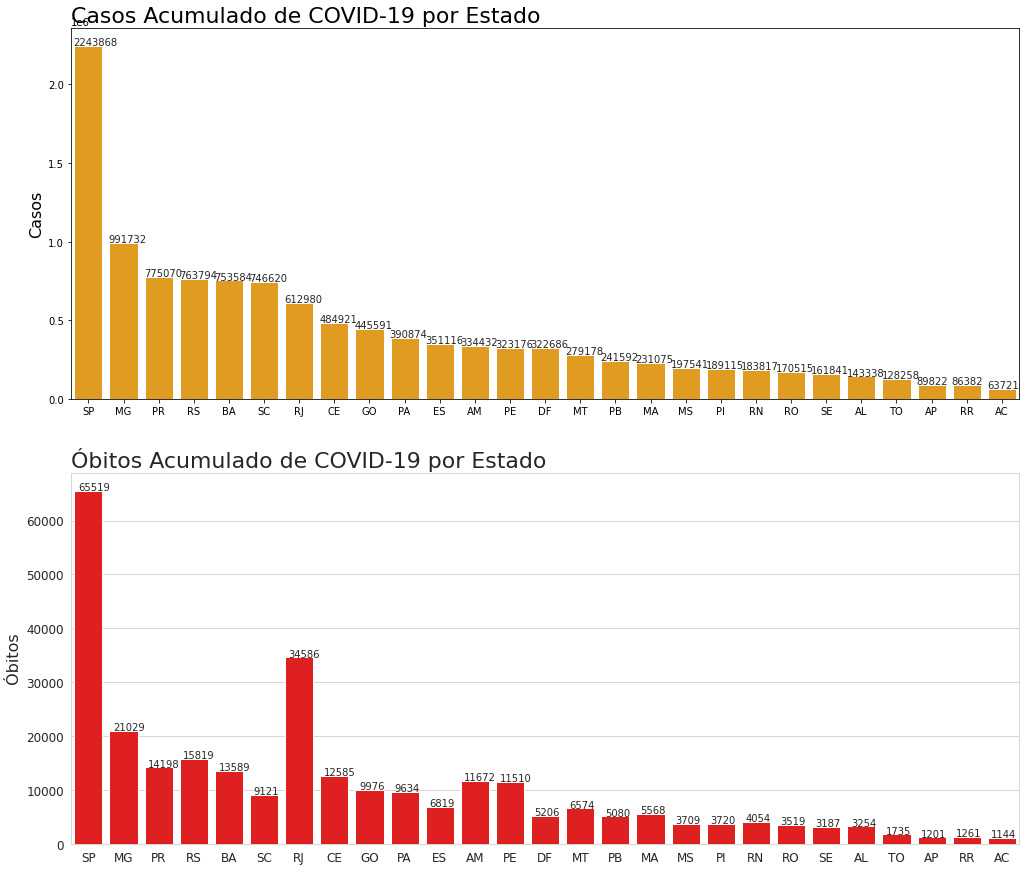

In [ ]:
ultimas = brasil.query('place_type == "state" & is_last')
ultimas = ultimas.sort_values('last_available_confirmed', ascending = False)

plt.figure(figsize=(17,15))
plt.subplot(211)
sns.set_style('whitegrid')
ax = sns.barplot(y=ultimas['last_available_confirmed'],x=ultimas['state'], color = 'orange')
ax.set_title('Casos Acumulado de COVID-19 por Estado',fontsize = 22,loc='left')
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12) 
ax.set_ylabel('Casos', fontsize = 16)
ax.set_xlabel(' ')

for k in ax.patches:
    b=k.get_bbox()
    ax.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1 - 0.85)/2 , b.y1 + 5000))
ax

plt.subplot(212)
sns.set_style('whitegrid')
ax = sns.barplot(y=ultimas['last_available_deaths'],x=ultimas['state'], color = 'red')
ax.set_title('Óbitos Acumulado de COVID-19 por Estado',fontsize = 22,loc='left')
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12) 
ax.set_ylabel(' Óbitos ', fontsize = 16)
ax.set_xlabel(' ')

for k in ax.patches:
    b=k.get_bbox()
    ax.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1 - 0.6)/2 , b.y1 + 100))
ax

### Análise Gráfica

> **Alguns casos que se destacam são Rio de Janeiro e Pernambuco.**
- Rio de Janeiro é o 3° estado com mais casos porém o segundo com o maior número de óbitos.

- Pernambuco é o 10° estado com mais casos e o 4° com maior número de óbitos.

> **Outros estados que fogem do esperado são: Distrito Federal e Santa Cantarina**
- Os dois são o 9° (DF) e 13° (SC) em número de casos porém aprensentam baixo número de óbitos sendo o 19°(DF) e 22°(SC) 


**OBS: Os dados de Goiás e DF são separados**

---

### GeoPlot dos Casos Acumulados e Óbitos Acumulados


In [ ]:
cidades = pd.read_csv('https://raw.githubusercontent.com/henriquevedoveli/modelagem-covid/master/notebooks/dados/coords-cidades.csv')
cidades = cidades.set_index('codigo_ibge')

cities = brasil.query('place_type == "city" & is_last')
cities = cities.dropna(subset=['city_ibge_code'])
cities['city_ibge_code'] = cities['city_ibge_code'].astype('int64')


In [ ]:
cities = cities.join(cidades, on='city_ibge_code')

print('Dados Nulos de Latitude e Longitude: {}'.format(cities[['latitude','longitude']].isnull().sum().sum()))
cities.head()

Dados Nulos de Latitude e Longitude: 0


,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths,nome,latitude,longitude,capital,codigo_uf
7479,Acrelândia,1200013,2021-03-16,202111,15490.0,15256.0,True,False,1059,6836.66882,2021-03-16,0.0179,19,353,city,AC,27,0,Acrelândia,-9.82581,-66.8972,0,12
7480,Assis Brasil,1200054,2021-03-16,202111,7534.0,7417.0,True,False,1237,16418.90098,2021-03-16,0.0121,15,320,city,AC,6,0,Assis Brasil,-10.92980,-69.5738,0,12
7481,Brasiléia,1200104,2021-03-16,202111,26702.0,26278.0,True,False,1958,7332.78406,2021-03-16,0.0138,27,312,city,AC,1,0,Brasiléia,-10.99500,-68.7497,0,12
7482,Bujari,1200138,2021-03-16,202111,10420.0,10266.0,True,False,835,8013.43570,2021-03-16,0.0108,9,343,city,AC,-1,1,Bujari,-9.81528,-67.9550,0,12
7483,Capixaba,1200179,2021-03-16,202111,12008.0,11733.0,True,False,387,3222.85143,2021-03-16,0.0284,11,313,city,AC,2,0,Capixaba,-10.56600,-67.6860,0,12


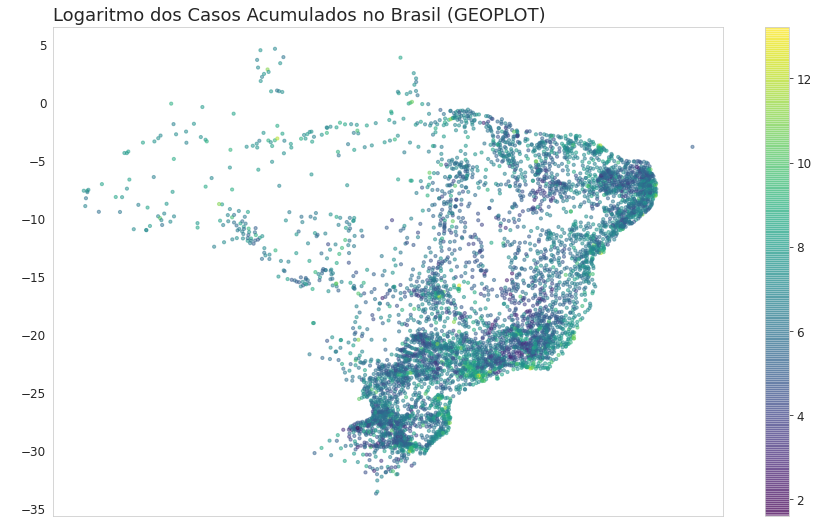

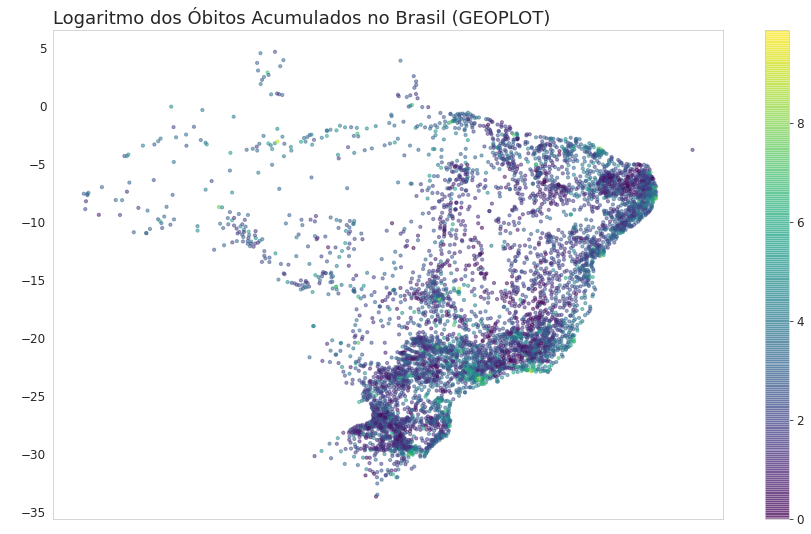

In [ ]:
ax = cities.plot(kind='scatter', x='longitude', y='latitude', alpha=0.5, c=np.log(cities['last_available_confirmed']+1), s=10, cmap=plt.get_cmap('viridis'), figsize=(15, 9))
plt.title('Logaritmo dos Casos Acumulados no Brasil (GEOPLOT)', fontsize = 18 ,loc = 'left')
plt.xlabel(' ')
plt.ylabel(' ')
plt.grid(False)
ax = cities.plot(kind='scatter', x='longitude', y='latitude', alpha=0.5, c=np.log(cities['last_available_deaths']+1), s=10, cmap=plt.get_cmap('viridis'), figsize=(15, 9))

plt.title('Logaritmo dos Óbitos Acumulados no Brasil (GEOPLOT)', fontsize = 18 ,loc = 'left')
plt.xlabel(' ')
plt.ylabel(' ')
plt.grid(False)
plt.show()

### Análise Gráfica

> Podemos ver que os gráfico do logaritmo dos casos nos mostra que o COVID-19 já se espalhou por todo território nacional, e o foco está na região Sul (São Paulo e Rio de Janeiro), porém podemos ver que existe muitos casos na região litorânea nordestina, assim como na região Norte.

> No gráfico do logaritimo dos óbitos podemos ver que o epicentro ainda é o estado de São e Rio de Janeiro, mais especificamente as capitais e regiões metropolitanas, mas podemos ver vários casos em Pernambuco e Ceará

#### *Obs:*   Apesar de não ser o melhor modo de se realizar um plot de mapas em python, foi o modo que eu optei por utilizar, já que se utilizasse bibliotecas mais elaboradas que Matplotlib como o Folium ou Plotly, por exemplo, a imagem ficaria muito pesada e possivelmente não carregaria e para visualiza-la teria que rodar todas as células do notebook.

## Plotando Séries Temporais para o Brasil e para o Paraná

---

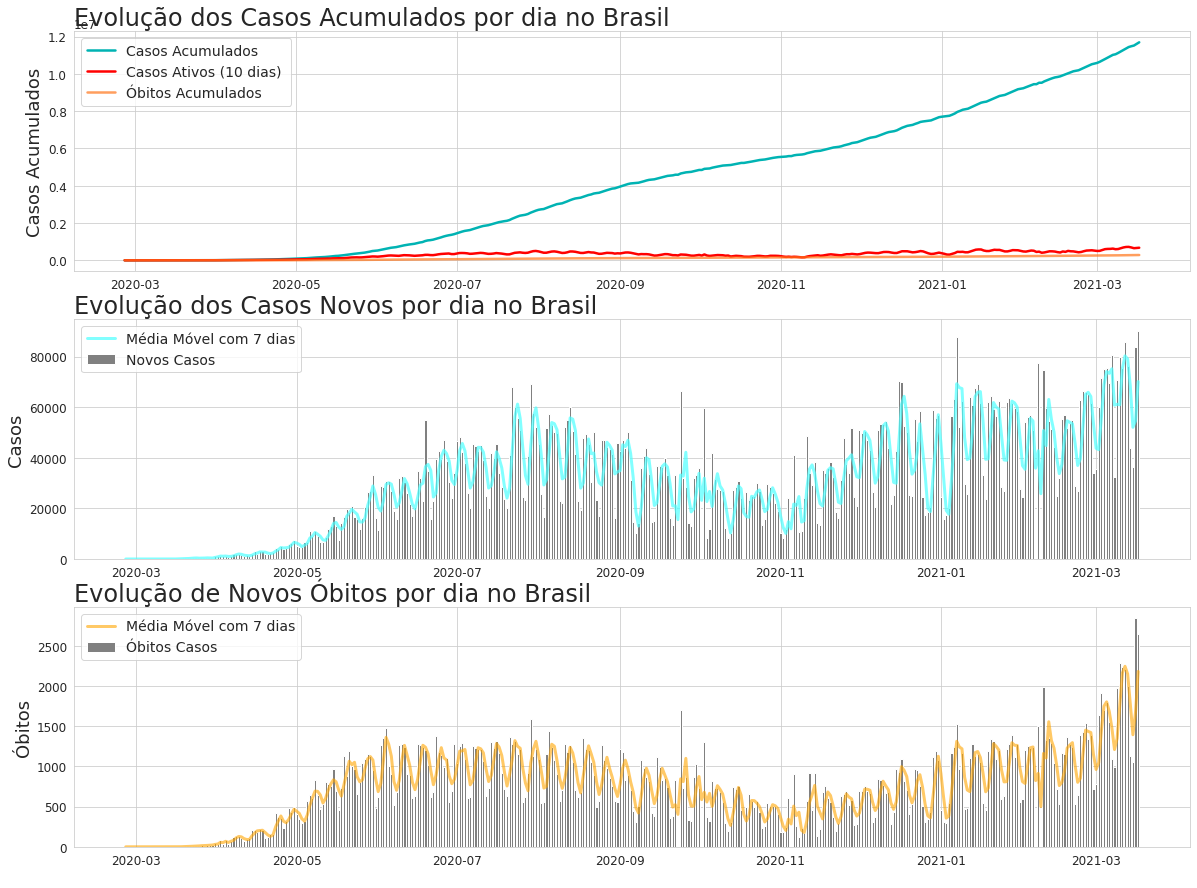

In [ ]:
plt.figure(figsize=(20,15))


plt.subplot(311)
sns.set_style('whitegrid')

ax = sns.lineplot(x = dados['data'], y =dados['casos_acumulados'] ,color = '#00b3b3', alpha = 1 , lw = 2.5)

ax = sns.lineplot(x = dados['data'], y =dados['casos_ativos'],color = 'red', alpha = 1 , lw = 2.5)

ax = sns.lineplot(x = dados['data'], y =dados['obitos_acumulados'],color = '#ff751a', alpha = .7 , lw = 2.5)

plt.legend(['Casos Acumulados','Casos Ativos (10 dias) ', 'Óbitos Acumulados'], fontsize = 14)
plt.ylabel('Casos Acumulados', fontsize = 18)
plt.xlabel(' ')
plt.title('Evolução dos Casos Acumulados por dia no Brasil', fontsize = 24, loc = 'left')

plt.subplot(312)


plt.bar(dados['data'],dados['casos_novos'], color= 'gray',)
plt.plot(dados['data'],dados['rolling_mean_casos_novos'], color = '#4dffff', lw = 3, alpha = .7)
plt.legend([f'Média Móvel com {n} dias', 'Novos Casos'], fontsize = 14, loc = 'upper left')
plt.xlabel(' ')
plt.ylabel('Casos', fontsize = 18)
plt.title('Evolução dos Casos Novos por dia no Brasil', fontsize = 24, loc = 'left')


plt.subplot(313)

plt.bar(dados['data'],dados['obitos_novos'], color= 'gray')
plt.plot(dados['data'],dados['rolling_mean_obitos_novos'], color = 'orange', lw = 3, alpha = .6)

plt.legend([f'Média Móvel com {n} dias', 'Óbitos Casos'], fontsize = 14, loc = 'upper left')
plt.xlabel(' ')
plt.ylabel('Óbitos', fontsize = 18)
plt.title('Evolução de Novos Óbitos por dia no Brasil', fontsize = 24, loc = 'left')



plt.show()

### Análise Gráfica

> Um ponto interresante a ser observado nos gráficos é que existem vales tanto nos gráficos de novos casos quanto de novos óbitos que se repetem de 6 em 6 dias, um dos motivos que pode estar causando estes vales são as subnotificações, pois estes vales são fins de semana (sábado e domingo).

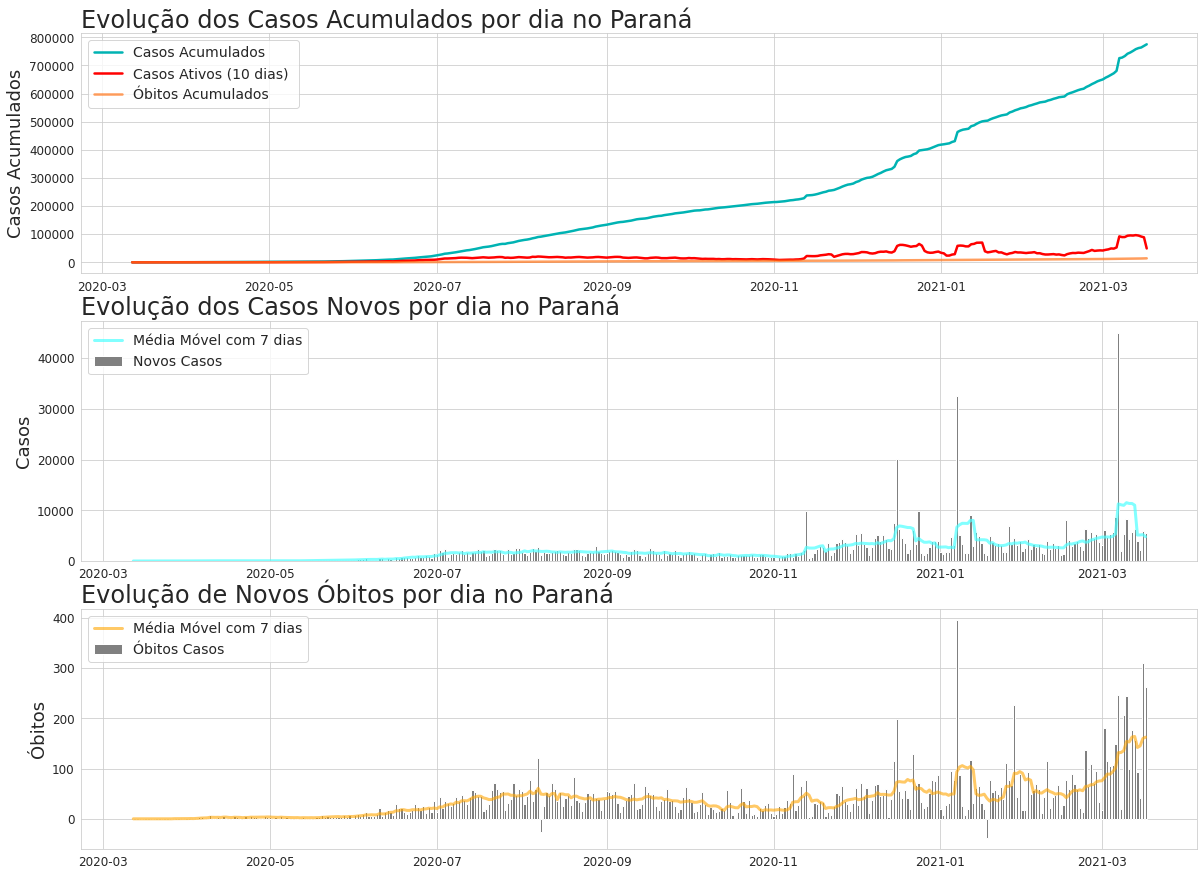

In [ ]:
plt.figure(figsize=(20,15))


plt.subplot(311)
sns.set_style('whitegrid')

ax = sns.lineplot(x = dados_estado['data'], y =dados_estado['casos_acumulados'] ,color = '#00b3b3', alpha = 1 , lw = 2.5)

ax = sns.lineplot(x = dados_estado['data'], y =dados_estado['casos_ativos'],color = 'red', alpha = 1 , lw = 2.5)

ax = sns.lineplot(x = dados_estado['data'], y =dados_estado['obitos_acumulados'],color = '#ff751a', alpha = .7 , lw = 2.5)

plt.legend(['Casos Acumulados','Casos Ativos (10 dias) ', 'Óbitos Acumulados'], fontsize = 14)
plt.ylabel('Casos Acumulados', fontsize = 18)
plt.xlabel(' ')
plt.title('Evolução dos Casos Acumulados por dia no Paraná', fontsize = 24, loc = 'left')

plt.subplot(312)


plt.bar(dados_estado['data'],dados_estado['casos_novos'], color= 'gray',)
plt.plot(dados_estado['data'],dados_estado['rolling_mean_casos_novos'], color = '#4dffff', lw = 3, alpha = .7)
plt.legend([f'Média Móvel com {n} dias', 'Novos Casos'], fontsize = 14, loc = 'upper left')
plt.xlabel(' ')
plt.ylabel('Casos', fontsize = 18)
plt.title('Evolução dos Casos Novos por dia no Paraná', fontsize = 24, loc = 'left')


plt.subplot(313)

plt.bar(dados_estado['data'],dados_estado['obitos_novos'], color= 'gray')
plt.plot(dados_estado['data'],dados_estado['rolling_mean_obitos_novos'], color = 'orange', lw = 3, alpha = .6)

plt.legend([f'Média Móvel com {n} dias', 'Óbitos Casos'], fontsize = 14, loc = 'upper left')
plt.xlabel(' ')
plt.ylabel('Óbitos', fontsize = 18)
plt.title('Evolução de Novos Óbitos por dia no Paraná', fontsize = 24, loc = 'left')



plt.show()